In [1]:
import pandas as pd
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Read the data set
df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv",
    na_values=['NA','?'])

# Generate dummies  for job
df = pd.concat([df,pd.get_dummies(df['job'],prefix="job")],axis=1)
df.drop('job', axis=1, inplace=True)

# Generate dummies for area
df = pd.concat([df,pd.get_dummies(df['area'],prefix="area")],axis=1)
df.drop('area', axis=1, inplace=True)

# Generate dummies for product
df = pd.concat([df,pd.get_dummies(df['product'],prefix="product")],axis=1)
df.drop('product', axis=1, inplace=True)

# Missing values for income
med = df['income'].median()
df['income'] = df['income'].fillna(med)

# Standardize ranges
df['income'] = zscore(df['income'])
df['aspect'] = zscore(df['aspect'])
df['save_rate'] = zscore(df['save_rate'])
df['subscriptions'] = zscore(df['subscriptions'])

# Convert to numpy - Classification
x_columns = df.columns.drop('age').drop('id')
x = df[x_columns].values
y = df['age'].values

# Create train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=42)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

# Build the neural network
model = Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(10, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto', 
                        restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),
          callbacks=[monitor],verbose=2,epochs=1000)

Epoch 1/1000
47/47 - 3s - loss: 1729.7604 - val_loss: 1402.4209
Epoch 2/1000
47/47 - 0s - loss: 1039.8135 - val_loss: 612.9375
Epoch 3/1000
47/47 - 0s - loss: 412.7373 - val_loss: 281.6874
Epoch 4/1000
47/47 - 0s - loss: 267.3720 - val_loss: 234.2183
Epoch 5/1000
47/47 - 0s - loss: 213.8736 - val_loss: 183.5358
Epoch 6/1000
47/47 - 0s - loss: 163.1277 - val_loss: 139.5817
Epoch 7/1000
47/47 - 0s - loss: 120.4840 - val_loss: 104.3845
Epoch 8/1000
47/47 - 0s - loss: 88.8474 - val_loss: 78.0558
Epoch 9/1000
47/47 - 0s - loss: 64.9358 - val_loss: 58.3578
Epoch 10/1000
47/47 - 0s - loss: 48.6636 - val_loss: 46.2607
Epoch 11/1000
47/47 - 0s - loss: 38.6197 - val_loss: 38.3109
Epoch 12/1000
47/47 - 0s - loss: 32.0662 - val_loss: 32.6227
Epoch 13/1000
47/47 - 0s - loss: 26.8889 - val_loss: 28.2361
Epoch 14/1000
47/47 - 0s - loss: 23.4990 - val_loss: 24.9415
Epoch 15/1000
47/47 - 0s - loss: 20.3237 - val_loss: 22.2484
Epoch 16/1000
47/47 - 0s - loss: 18.1637 - val_loss: 19.9891
Epoch 17/1000
47

In [3]:
from sklearn import metrics

# Predict
pred = model.predict(x_test)

# Measure MSE error.  
score = metrics.mean_squared_error(pred,y_test)
print("Final score (MSE): {}".format(score))

Final score (MSE): 0.5139461474599156


In [4]:
import numpy as np

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 0.716900374849892


In [5]:
# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

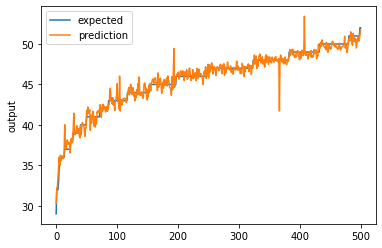

In [6]:
chart_regression(pred.flatten(),y_test)